## xcube-geodb and xcube-gen Hands-On Workshop &Phi;-Week 2020
### Alicja Balfanz and Helge Dzierzon from Brockmann Consult


## 1) Using the xcube-geodb

The xcube-geodb consists of a Restful service and a Python client. Let's import the Python dependencies to access the geodb service.

__Step 1__: Import the geodb client

In [57]:
from xcube_geodb.core.geodb import GeoDBClient

__Step 2__: Instantiate the client

In [69]:
geodb = GeoDBClient()

__Step 3__: As a subscriber a user name is associated with you. Check your user name.

In [70]:
geodb.whoami

'geodb_dbf6155e-c330-4243-a217-f74ecdfc3ec6'

__Step 4__: Let's see what collections you have access to.

In [ ]:
ds = geodb.get_my_collections()
ds

__Step 5__: In the next step you will create a collection

In [ ]:
# geodb.drop_collection('land_use')

# Have a look at fiona feature schema
collections = {
        "land_use": 
        {
            "crs": 3794,
            "properties": 
            {
                "RABA_PID": "float", 
                "RABA_ID": "float", 
                "D_OD": "date"
            }
        }
    }


geodb.create_collections(collections)

__Step 6__: Let's check whether the collection has been created

In [ ]:
ds = geodb.get_my_collections()
ds

__Step 7__: No collection is fúseful without data. We have created a sample dataset for you which you no load from an S3 AWS object store and open it into a GeoDataFrame.

In [63]:
import requests 
from io import BytesIO
from zipfile import ZipFile

url = "https://eurodatacube-phiweek.s3.eu-central-1.amazonaws.com/hands-on/sample.zip"
r = requests.get(url)

zipfile = ZipFile(BytesIO(r.content))
zipfile.extractall()

In [ ]:
import geopandas
gdf = geopandas.read_file('land_use.shp')
gdf

In [65]:
geodb.insert_into_collection('land_use', gdf)

Processing rows from 1 to 9827


9827 rows inserted into land_use

In [ ]:
df = geodb.get_collection('land_use', query="raba_id=eq.7000")
df

In [68]:
df.crs

* Data access via xcube-sh  
* C3S ERA5 data generated by xcube Generator and stored in object storage  


##  1) Data access via xcube-sh

In [5]:
client_id="a79c8709-0b66-4030-ad8f-275a2eded351"
client_secret="n!dq>rfH~Kr2jLuRO9J9f)-M,jF*22!gfdK5l{lQ"
instance_id="09b66518-445c-4726-bc8b-cf0058281e75"

Please fill in your SentinelHub credentials: 

In [ ]:
client_id="your client id"
client_secret="your client secret"
instance_id="your instance id"

In [55]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`
* `SH_CLIENT_ID`, `SH_CLIENT_NAME`, `SH_CLIENT_SECRET`, `SH_INSTANCE_ID`
* `XCUBE_GEN_API_SERVER_PORT`, `XCUBE_GEN_API_SERVER_URL`, `XCUBE_GEN_API_USER_NAME`, `XCUBE_GEN_AUTH_AUD`, `XCUBE_GEN_AUTH_CLIENT_ID`, `XCUBE_GEN_AUTH_CLIENT_SECRET`, `XCUBE_GEN_AUTH_DOMAIN`



Import packages for xcube-sh download:

In [7]:
# xcube_sh imports
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig

# various utilities
import json
import xarray as xr
import shapely.geometry
import IPython.display
import zarr
from dask.diagnostics import ProgressBar

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Setting CubeConfig parameters for generating S2 cubes:

In [43]:
dataset_name = 'S2L2A' # dataset name
band_names = ['B04', 'B05', 'B06', 'B08', 'SCL', 'CLD'] # band names
tile_size = [500, 500] # tile size 
# geometry (bounding box for the area covering Copenhagen)
x1 = 8.81
y1 = 47.46
x2 = 9.77
y2 = 47.84
bbox = x1, y1, x2, y2
spatial_res = 0.00018 # spatial resolution (approx. 20 m in degree)
#time_period = '2D' # time period (frequency between dates)
time_tolerance='2H'

A description about the dataset and the bands may be found here: https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/

Setting cube configurations for 2018 summer season (Mai - August):

In [45]:
cube_config_2018 = CubeConfig(dataset_name = dataset_name,
                         band_names = band_names,
                         tile_size = tile_size, 
                         bbox = bbox,
                         spatial_res = spatial_res,
                         time_range = ['2018-05-01', '2018-08-31'],
                         time_tolerance = time_tolerance)

View bounding box to check seleceted area:

In [44]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Open data cube:

In [46]:
#cube_S2_2020 = open_cube(cube_config_2020, client_id=SH_CLIENT_ID,client_secret=SH_CLIENT_SECRET,instance_id=SH_INSTANCE_ID)
cube_S2_2018 = open_cube(cube_config_2018)
cube_S2_2018

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2500, lon: 5500, time: 48)
Coordinates:
  * lat        (lat) float64 47.91 47.91 47.91 47.91 ... 47.46 47.46 47.46 47.46
  * lon        (lon) float64 8.81 8.81 8.81 8.811 8.811 ... 9.799 9.8 9.8 9.8
  * time       (time) datetime64[ns] 2018-05-02T10:24:34 ... 2018-08-30T10:25:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B06        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    CLD        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2020-09-29T08:33:45.981946
    processing_level:        L2A
    time_coverage_start:     2018-05-02T10:24:34+00:00
    time_coverage_end:       2018-08-30T10:25:24+00:00
    time_coverage_duration:  P120DT0H0M50S
    geospatial_lon_min:      8.81
    geospatial_lat_min:      47.46
    geospatial_lon_max:      9.8
    geospatial_lat_max:      47.910000000000004

Plot a single scene for a specific timestamp and band:

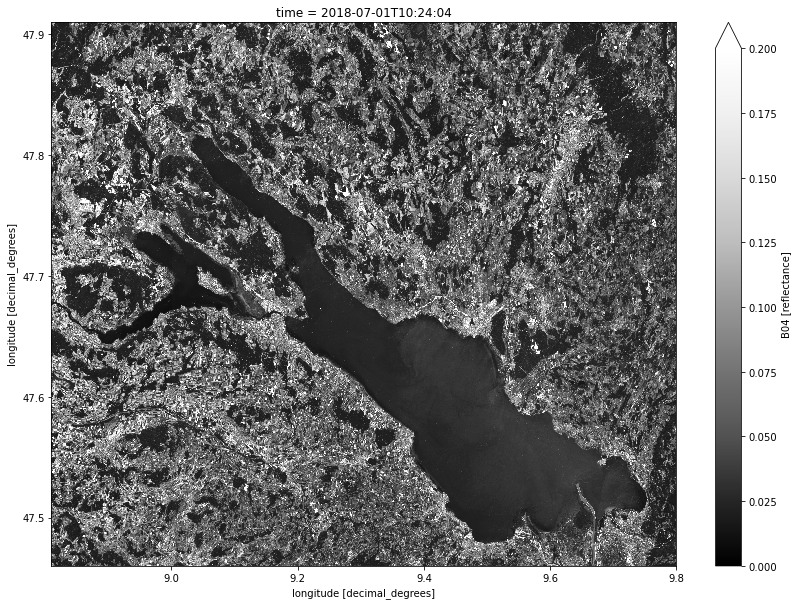

In [48]:
cube_S2_2018.B04.sel(time='2018-06-30 12:00:00', method='nearest').plot.imshow(vmin=0, vmax=0.2, cmap='Greys_r', figsize=(14, 10))

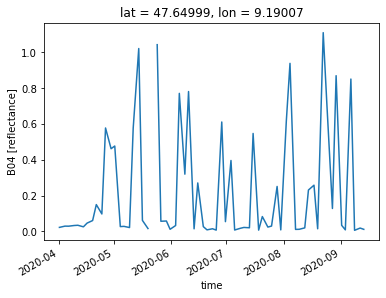

In [8]:
cube_S2_2018.B04.sel(lat=47.65, lon=9.19, method='nearest').plot()

In order to use a smaller subset for the following computations: 

In [49]:
dataset_name = 'S2L2A' # dataset name
band_names = ['B04', 'B05', 'B06', 'B08', 'SCL', 'CLD'] # band names
tile_size = [500, 500] # tile size 
# geometry (bounding box for the area covering Copenhagen)
x1 = 8.88
y1 = 47.63
x2 = 9.24
y2 = 47.82
bbox = x1, y1, x2, y2
spatial_res = 0.00018 # spatial resolution (approx. 20 m in degree)
#time_period = '2D' # time period (frequency between dates)
time_tolerance='2H'

In [50]:
cube_config_2018= CubeConfig(dataset_name = dataset_name,
                         band_names = band_names,
                         tile_size = tile_size, 
                         bbox = bbox,
                         spatial_res = spatial_res,
                         time_range = ['2018-05-01', '2018-08-31'],
                         time_tolerance = time_tolerance)

In [16]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

In [17]:
cube_S2_2018 = open_cube(cube_config_2018)
cube_S2_2018

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1500, lon: 2000, time: 48)
Coordinates:
  * lat        (lat) float64 47.9 47.9 47.9 47.9 ... 47.63 47.63 47.63 47.63
  * lon        (lon) float64 8.88 8.88 8.88 8.881 8.881 ... 9.239 9.24 9.24 9.24
  * time       (time) datetime64[ns] 2018-05-02T10:24:34 ... 2018-08-30T10:25:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    CLD        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2020-09-29T07:37:02.356331
    processing_level:        L2A
    time_coverage_start:     2018-05-02T10:24:34+00:00
    time_coverage_end:       2018-08-30T10:25:24+00:00
    time_coverage_duration:  P120DT0H0M50S
    geospatial_lon_min:      8.88
    geospatial_lat_min:      47.63
    geospatial_lon_max:      9.24
    geospatial_lat_max:      47.900000000000006

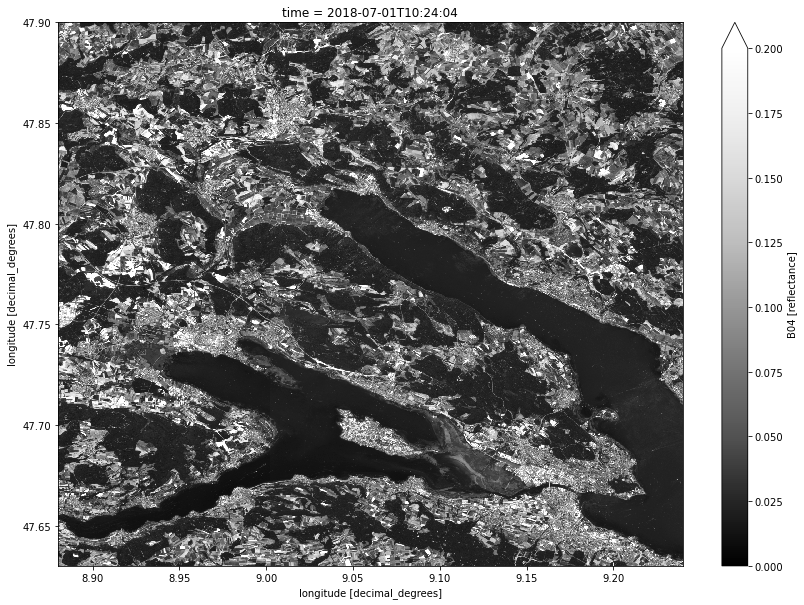

In [20]:
cube_S2_2018.B04.sel(time='2018-06-30 12:00:00', method='nearest').plot.imshow(vmin=0, vmax=0.2, cmap='Greys_r', figsize=(14, 10))

Save cube as zarr:

In [21]:
#cube_S2_2018.to_zarr('Lake_Constanz_cube_2018.zarr')

In [22]:
cube = xr.open_zarr('Lake_Constanz_cube_2018.zarr')

In [23]:
# xcube imports
from xcube.core.compute import compute_cube
from xcube.core.maskset import MaskSet
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry

In [24]:
mask = MaskSet(cube.SCL)
mask

In [25]:
mask.clouds_high_probability

<xarray.DataArray 'clouds_high_probability' (time: 48, lat: 1500, lon: 2000)>
dask.array<where, shape=(48, 1500, 2000), dtype=uint8, chunksize=(1, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 47.9 47.9 47.9 47.9 47.9 ... 47.63 47.63 47.63 47.63
  * lon      (lon) float64 8.88 8.88 8.88 8.881 8.881 ... 9.239 9.24 9.24 9.24
  * time     (time) datetime64[ns] 2018-05-02T10:24:34 ... 2018-08-30T10:25:24

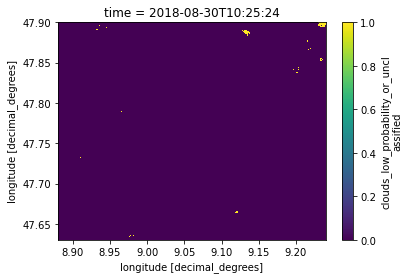

In [26]:
mask.clouds_low_probability_or_unclassified.sel(time='20-06-20 12:00:00', method='nearest').plot.imshow()

In [27]:
cube_wo_clouds = cube.where( xr.ufuncs.logical_not(mask.cloud_shadows | mask.snow_or_ice | mask.saturated_or_defective | mask.cirrus | mask.clouds_low_probability_or_unclassified | mask.clouds_medium_probability | mask.clouds_high_probability | mask.water))

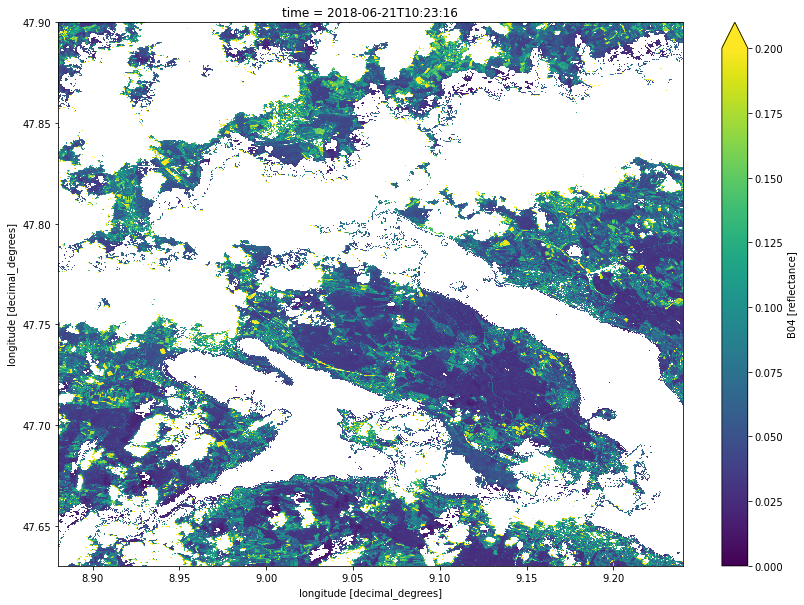

In [31]:
cube_wo_clouds.B04.sel(time='2018-06-20 12:00:00', method='nearest').plot.imshow(vmin=0, vmax=.2, figsize=(14, 10))

In [32]:
def compute_NDVI(B04, B08):
    return (B08 - B04) / (B08 + B04)

In [33]:
NDVI_cube = compute_cube(compute_NDVI,cube_wo_clouds, input_var_names=['B04', 'B08'], output_var_name='NDVI')
NDVI_cube

<xarray.Dataset>
Dimensions:  (lat: 1500, lon: 2000, time: 48)
Coordinates:
  * lat      (lat) float64 47.9 47.9 47.9 47.9 47.9 ... 47.63 47.63 47.63 47.63
  * lon      (lon) float64 8.88 8.88 8.88 8.881 8.881 ... 9.239 9.24 9.24 9.24
  * time     (time) datetime64[ns] 2018-05-02T10:24:34 ... 2018-08-30T10:25:24
Data variables:
    NDVI     (time, lat, lon) float64 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>

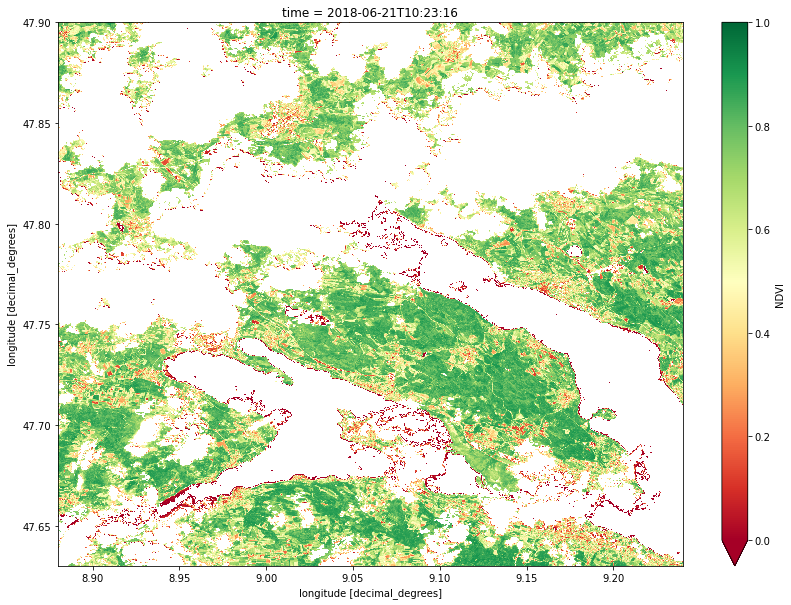

In [34]:
NDVI_cube.NDVI.sel(time='2018-06-20 12:00:00', method='nearest').plot.imshow(vmin=0, vmax=1.,cmap='RdYlGn', figsize=(14, 10))

In [35]:
monthly_NDVI = NDVI_cube.NDVI.groupby('time.month').max(dim='time')

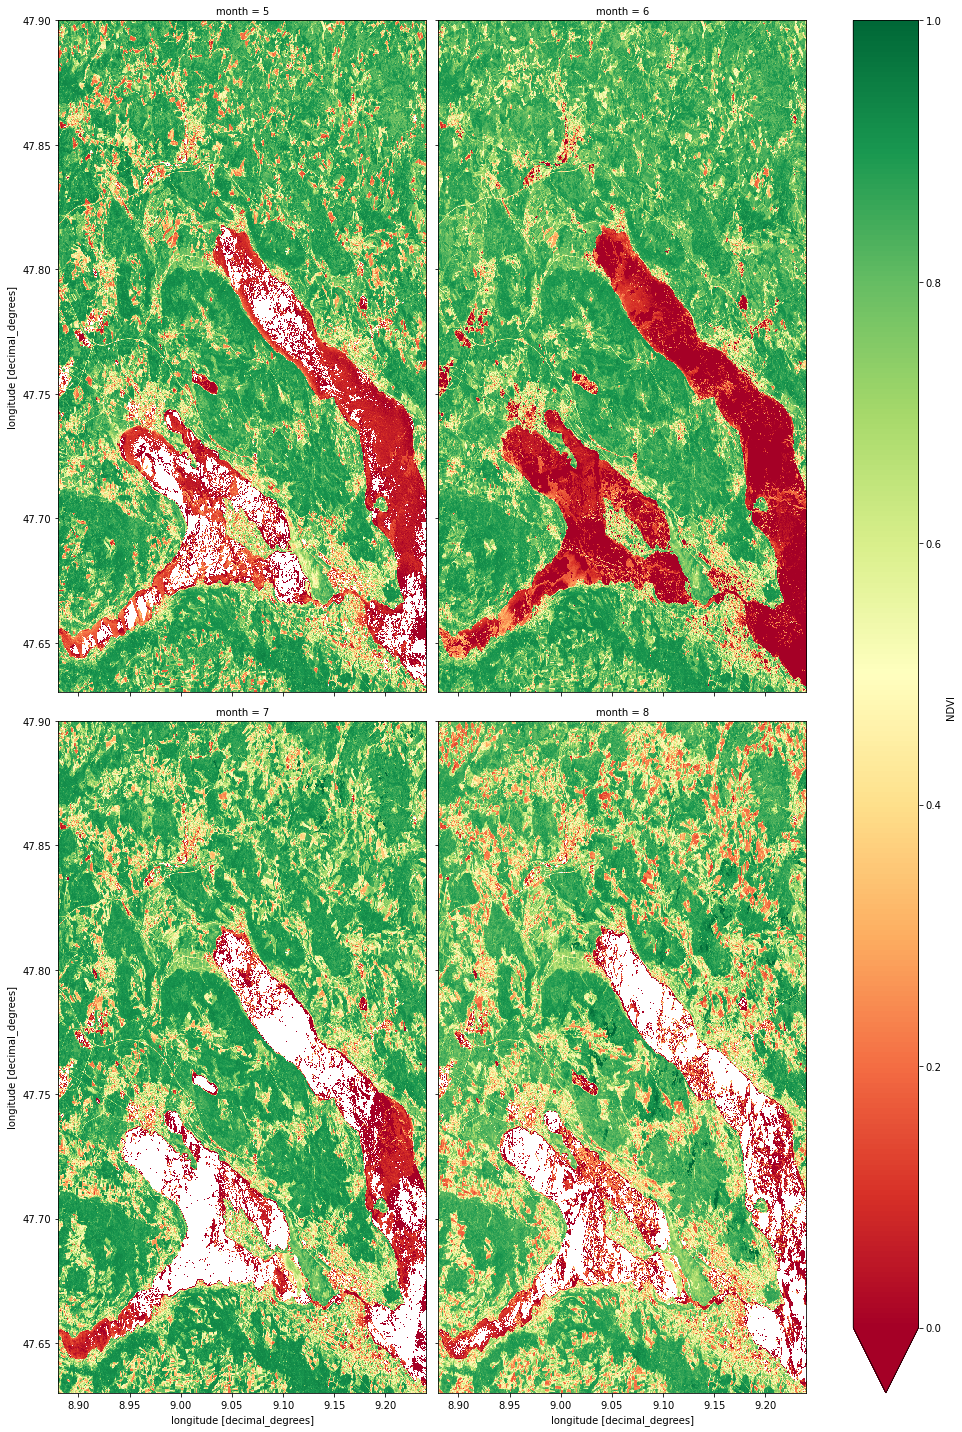

In [36]:
monthly_NDVI.plot.imshow(x='lon',y='lat',col='month',col_wrap=2, vmin=0, vmax=1.,cmap='RdYlGn', figsize=(14, 20))

## In case we have way too much time, we can do some more cube computations, this time for water:

In order to use a shorter time subset for the following computations: 

In [51]:
dataset_name = 'S2L2A' # dataset name
band_names = ['B04', 'B05', 'B06', 'B08', 'SCL', 'CLD'] # band names
tile_size = [500, 500] # tile size 
# geometry (bounding box for the area covering Copenhagen)
x1 = 8.88
y1 = 47.63
x2 = 9.24
y2 = 47.82
bbox = x1, y1, x2, y2
spatial_res = 0.00018 # spatial resolution (approx. 20 m in degree)
#time_period = '2D' # time period (frequency between dates)
time_tolerance='2H'

In [52]:
cube_config_June_2018= CubeConfig(dataset_name = dataset_name,
                         band_names = band_names,
                         tile_size = tile_size, 
                         bbox = bbox,
                         spatial_res = spatial_res,
                         time_range = ['2018-06-01', '2018-06-30'],
                         time_tolerance = time_tolerance)

In [53]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

In [54]:
cube_S2_June_2018 = open_cube(cube_config_June_2018)
cube_S2_June_2018

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1500, lon: 2000, time: 12)
Coordinates:
  * lat        (lat) float64 47.9 47.9 47.9 47.9 ... 47.63 47.63 47.63 47.63
  * lon        (lon) float64 8.88 8.88 8.88 8.881 8.881 ... 9.239 9.24 9.24 9.24
  * time       (time) datetime64[ns] 2018-06-01T10:20:24 ... 2018-06-29T10:30:21
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B06        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    CLD        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2020-09-29T08:49:37.968361
    processing_level:        L2A
    time_coverage_start:     2018-06-01T10:20:24+00:00
    time_coverage_end:       2018-06-29T10:30:21+00:00
    time_coverage_duration:  P28DT0H9M57S
    geospatial_lon_min:      8.88
    geospatial_lat_min:      47.63
    geospatial_lon_max:      9.24
    geospatial_lat_max:      47.900000000000006

In [37]:
water_cube = cube.where(mask.water)
water_cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1500, lon: 2000, time: 48)
Coordinates:
  * lat        (lat) float64 47.9 47.9 47.9 47.9 ... 47.63 47.63 47.63 47.63
  * lon        (lon) float64 8.88 8.88 8.88 8.881 8.881 ... 9.239 9.24 9.24 9.24
  * time       (time) datetime64[ns] 2018-05-02T10:24:34 ... 2018-08-30T10:25:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    CLD        (time, lat, lon) float64 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    SCL        (time, lat, lon) float64 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    date_created:            2020-09-29T07:37:02.356331
    geospatial_lat_max:      47.900000000000006
    geospatial_lat_min:      47.63
    geospatial_lon_max:      9.24
    geospatial_lon_min:      8.88
    history:                 [{'cube_config': {'band_names': ['B04', 'B08', '...
    processing_level:        L2A
    time_coverage_duration:  P120DT0H0M50S
    time_coverage_end:       2018-08-30T10:25:24+00:00
    time_coverage_start:     2018-05-02T10:24:34+00:00
    title:                   S2L2A Data Cube Subset

In [ ]:
def compute_mci(b_from, b_peek, b_to, input_params, dim_coords):
    # The first three arguments are chunks of the three input variables we define below. 
    # You can name them as you like. They are pure 3D numpy arrays.
    
    # The 'input_params' argument is a standard parameter that we define in the call below.
    wlen_from = input_params['wlen_from']
    wlen_peek = input_params['wlen_peek']
    wlen_to = input_params['wlen_to']
    
    # The 'dim_coords' argument is optional and provides the coordinate values for all dimension 
    # of the current chunk. We don't use it here, but for many algorithms this is important 
    # information (e.g. looking up aux data).
    lon, lat = (dim_coords[dim] for dim in ('lon', 'lat'))
    # print('dim_coords from', lon[0], lat[0], 'to', lon[-1], lat[-1])
    
    # You can use any popular data packages such as numpy, scipy, dask here,
    # or we can use ML packages such as scikitlearn!
    # For simplity, we do some very simple array math here:

    f = (wlen_peek - wlen_from) / (wlen_to - wlen_from)
    mci = (b_peek - b_from) - f * (b_to - b_from)

    return mci

Prepare input parameters from band attributes:

In [39]:
input_params = dict(wlen_from=water_cube.B04.attrs['wavelength'],
                    wlen_peek=water_cube.B05.attrs['wavelength'],
                    wlen_to=water_cube.B06.attrs['wavelength'])

AttributeError: 'Dataset' object has no attribute 'B05'

In [40]:
mci_cube = compute_cube(compute_mci, 
                        water_cube, 
                        input_var_names=['B04', 'B05', 'B06'], 
                        input_params=input_params, 
                        output_var_name='mci')
mci_cube

NameError: name 'compute_mci' is not defined

In [18]:
mci_cube.mci.attrs['long_name'] = 'Maximum Chlorophyll Index'
mci_cube.mci.attrs['units'] = 'unitless'
mci_cube.mci

<xarray.DataArray 'mci' (time: 16, lat: 278, lon: 1024)>
dask.array<cube_func_wrapper, shape=(16, 278, 1024), dtype=float64, chunksize=(1, 278, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 54.33 54.33 54.33 54.33 ... 54.28 54.28 54.28 54.28
  * lon      (lon) float64 10.37 10.37 10.37 10.37 ... 10.55 10.55 10.55 10.55
  * time     (time) datetime64[ns] 2019-07-23 2019-07-27 ... 2019-09-21
Attributes:
    long_name:  Maximum Chlorophyll Index
    units:      unitless

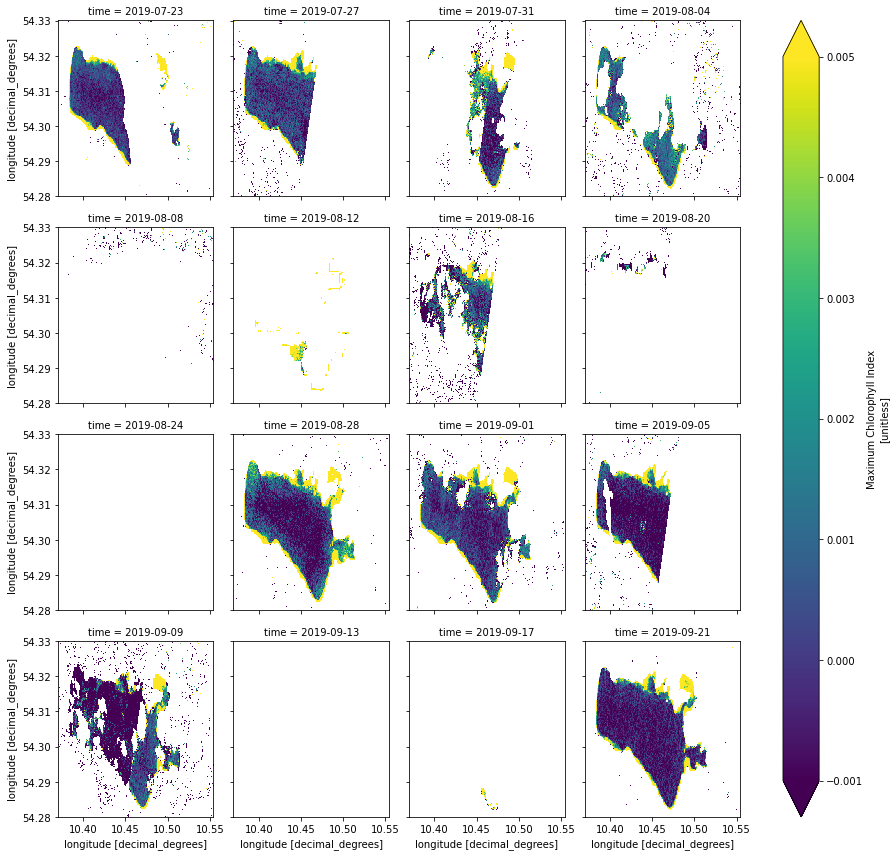

In [19]:
mci_cube.mci.plot.imshow(col='time', col_wrap=4, vmin=-0.001, vmax=0.005, cmap='viridis')

---

Time series at a given point:

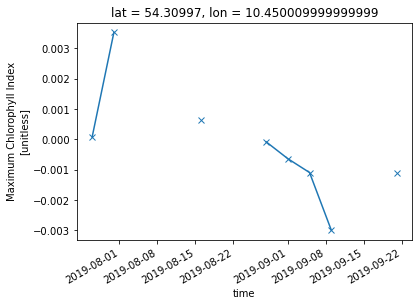

In [20]:
mci_cube.mci.sel(lat=54.31, lon=10.45, method='nearest').plot.line(marker='x')

Time series of the means of each time step:

D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


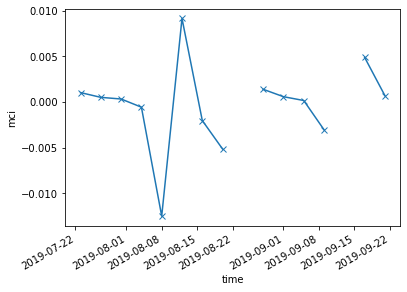

In [21]:
mci_cube.mci.mean(dim=('lat', 'lon'), skipna=True).plot.line(marker='x')

Mean of all time steps:

In [22]:
mci_mean = mci_cube.mci.mean(dim='time')

D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


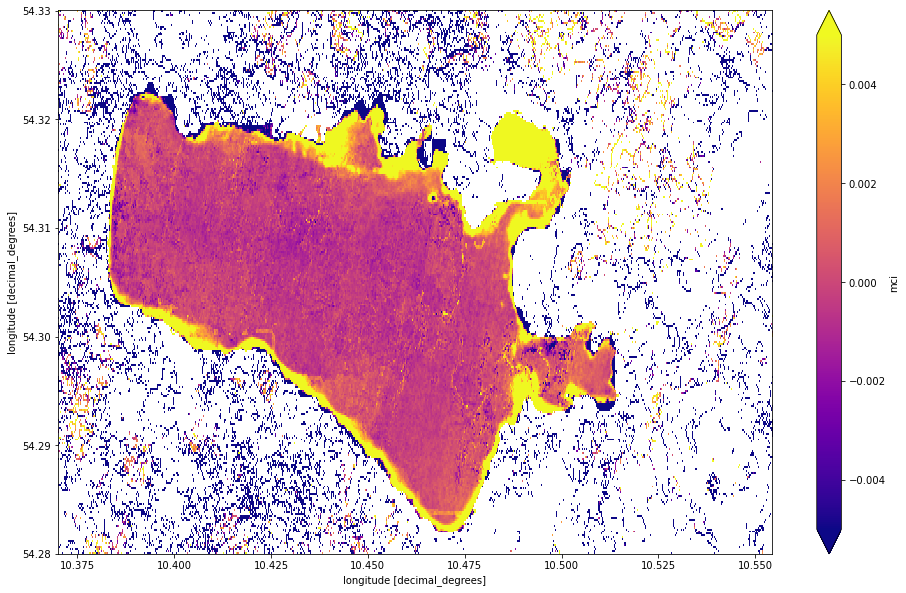

In [23]:
mci_mean.plot.imshow(vmin=-0.005, vmax=0.005, cmap='plasma', figsize=(16,10))

Anomaly w.r.t. to the mean for each time step:

In [24]:
mci_anomaly = mci_cube.mci - mci_mean

D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\Miniconda3\envs\xcube\lib\site-packag

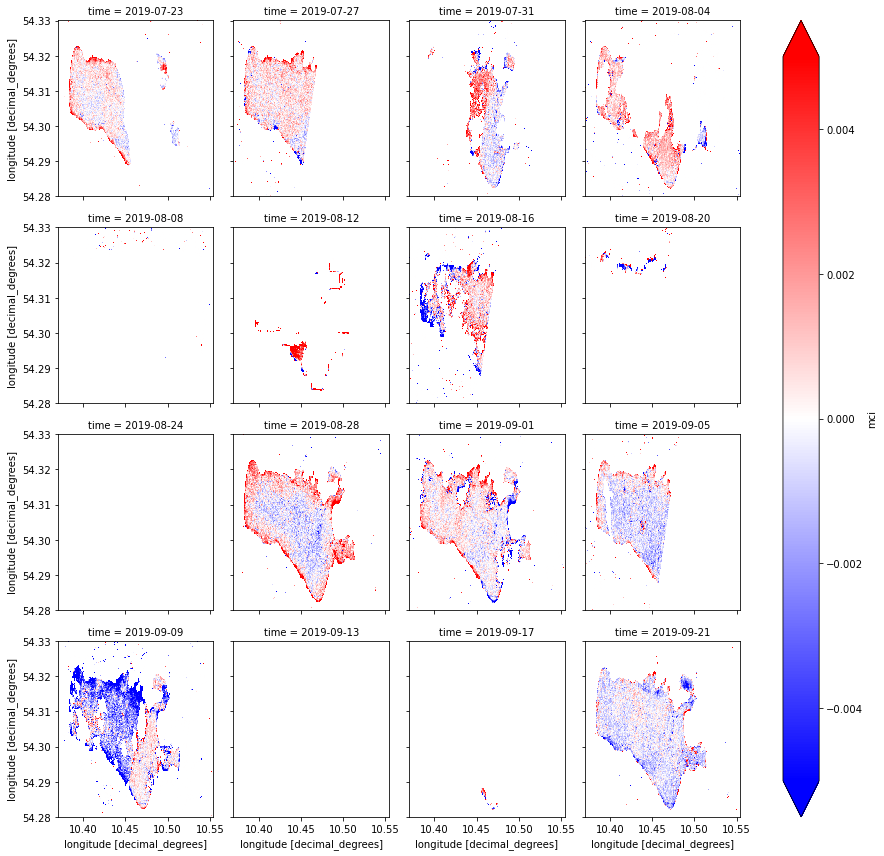

In [25]:
mci_anomaly.plot.imshow(col='time', col_wrap=4, vmin=-0.005, vmax=0.005, cmap='bwr')

In [38]:
water_cube.B04.plot.imshow(col='time', col_wrap=4, vmin=0, vmax=0.05, cmap='Greys_r')

Error in callback <function flush_figures at 0x7ffb46851830> (for post_execute):


KeyboardInterrupt: 

##  2) Generated C3S ERA-5 Cube, stored in OBS

In [5]:
from xcube.core.dsio import open_cube
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact 
import json


In [ ]:
open_cube

In [2]:
#import s3fs
#def open_cube(path):
 #   return xr.open_zarr(s3fs.S3Map(path, s3=s3fs.S3FileSystem()))

In [25]:
ds = open_cube('eurodatacube-test/xcube-gen-f8207f0e-636d-4267-8ac5-abbdc5d121fc.zarr')

ValueError: group not found at path ''

In [ ]:
open_cube()

In [7]:
with open(pathlib.Path.home() / '.aws_login.json') as fh:
    credentials = json.load(fh)
credentials

ERA5 = open_cube('https://s3.console.aws.amazon.com/eurodatacube-test/xcube-gen-f8207f0e-636d-4267-8ac5-abbdc5d121fc.zarr', client_kwargs=credentials)

ValueError: group not found at path ''

In [ ]:
ERA5

In [ ]:
ERA5.t2m.isel(time=1).plot(figsize=(14, 10))

In [ ]:
T2M_monthly_anomalies = xr.apply_ufunc(lambda x, m: (x - m), ERA5.t2m.groupby('time.month'),  ERA5.t2m.groupby('time.month').mean(dim='time'), dask='allowed')
T2M_quarterly = ERA5.t2m.resample(time = '1Y',keep_attrs = True).mean('time')

In [ ]:
T2M_quarterly 

In [ ]:
#ERA5.t2m.sel(lat=55.7, lon=12.55, method='nearest').plot(figsize=(18, 6))

#precip_1D = ESDC_time['precipitation'].sel(lon = 12.67,lat = 41.83, method = 'nearest')

fig, ax = plt.subplots(figsize = [14,8], nrows=3)

ERA5.t2m.sel(lat=55.7, lon=12.55, method='nearest').plot(ax = ax[0],color ='red', marker ='.')
T2M_quarterly.sel(lat=55.7, lon=12.55, method='nearest').plot(ax = ax[0],color ='green')
ax[0].set_title("Temperature Copenhagen")
T2M_monthly_anomalies.sel(lat=55.7, lon=12.55, method='nearest').plot(ax = ax[1],color ='blue', marker ='.')
ax[1].set_title("Temperature Anomalies Copenhagen")
ERA5.t2m.sel(lat=55.7, lon=12.55, method='nearest').plot.hist(ax = ax[2], color ='blue',bins = 20)
ax[2].set_title("Histogram Temperatures")
plt.tight_layout()

In [ ]:
def plot_hovmoeller(longitude=118, var_name='t2m'):
    plt.figure(figsize=(18,9))
    ERA5[var_name].isel(lon=longitude).plot.contourf()
    plt.title('Hovmöller Plot at longitude ' + str(ERA5.lon.isel(lon=longitude).values))
    plt.xlabel('Latitude')
    plt.ylabel('Month')
    #cbar = plt.colorbar(hovmoell)
    #cbar.ax.set_ylabel('mean ' + var_name)
    plt.show()

In [ ]:
interact(plot_hovmoeller, longitude=(0,ERA5.lon.size - 1,1), var_name='t2m')